In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Weather_TimeSeries.csv')

In [5]:
df.columns

Index(['State', 'District', 'Lat', 'Long', 'Year', 'Month', 'Solar_Radiation',
       'Precipitation', 'Surface_Pressure', 'Humidity', 'Dew_Frost_Point',
       'Temp_Max', 'Temp_Min', 'Wind_Speed'],
      dtype='object')

In [6]:
df['District'].value_counts()

PRATAPGARH    912
HAMIRPUR      912
AURANGABAD    912
TIKAMGARH     456
SHRAWASTI     456
             ... 
THANJAVUR     456
RATLAM        456
ARIYALUR      456
VIDISHA       456
BALANGIR      456
Name: District, Length: 516, dtype: int64

In [7]:
df_city = df.loc[df['State'] == 'MADHYA PRADESH'][df['District'] == 'GWALIOR'].copy()

In [8]:
df_city = df_city.sort_values(by=['Year', 'Month'])

In [9]:
df_city

,State,District,Lat,Long,Year,Month,Solar_Radiation,Precipitation,Surface_Pressure,Humidity,Dew_Frost_Point,Temp_Max,Temp_Min,Wind_Speed
660,MADHYA PRADESH,GWALIOR,26.03125,78.14721,1982,1,-99.00,42.65,99.26,47.92,4.75,24.66,9.99,1.37
659,MADHYA PRADESH,GWALIOR,26.03125,78.14721,1982,2,-99.00,17.74,99.01,43.27,4.09,25.78,10.11,1.59
658,MADHYA PRADESH,GWALIOR,26.03125,78.14721,1982,3,-99.00,19.20,98.75,36.69,6.57,31.43,14.28,1.96
657,MADHYA PRADESH,GWALIOR,26.03125,78.14721,1982,4,-99.00,21.60,98.23,24.55,7.07,39.13,21.86,2.10
656,MADHYA PRADESH,GWALIOR,26.03125,78.14721,1982,5,-99.00,17.96,98.15,28.19,11.99,40.86,26.03,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231541,MADHYA PRADESH,GWALIOR,26.03125,78.14721,2019,8,14.96,7.29,97.64,78.89,25.30,33.26,25.96,2.06
231549,MADHYA PRADESH,GWALIOR,26.03125,78.14721,2019,9,14.25,6.68,98.13,85.45,24.97,30.86,24.86,1.50
231550,MADHYA PRADESH,GWALIOR,26.03125,78.14721,2019,10,16.18,0.48,98.83,71.81,19.01,29.90,19.51,1.16
231552,MADHYA PRADESH,GWALIOR,26.03125,78.14721,2019,11,12.63,0.03,99.04,64.14,14.81,28.57,16.52,1.36


In [10]:
df_city.columns

Index(['State', 'District', 'Lat', 'Long', 'Year', 'Month', 'Solar_Radiation',
       'Precipitation', 'Surface_Pressure', 'Humidity', 'Dew_Frost_Point',
       'Temp_Max', 'Temp_Min', 'Wind_Speed'],
      dtype='object')

In [11]:
df = pd.DataFrame(columns=['Date', 'Solar_Radiation','Precipitation',
                           'Surface_Pressure', 'Humidity', 'Dew_Frost_Point',
                           'Temp_Max', 'Temp_Min', 'Wind_Speed'])

weather_cols = ['Solar_Radiation', 'Precipitation','Surface_Pressure', 'Humidity', 'Dew_Frost_Point', 'Temp_Max', 'Temp_Min', 'Wind_Speed']

df['Date'] = pd.to_datetime(df_city['Year'].astype(str) + '-' + df_city['Month'].astype(str) + '-1')
df[weather_cols] = df_city[weather_cols].copy()

In [12]:
df.Date.describe()

count                     456
unique                    456
top       2009-09-01 00:00:00
freq                        1
first     1982-01-01 00:00:00
last      2019-12-01 00:00:00
Name: Date, dtype: object

In [13]:
df.set_index('Date', inplace=True)
df

,Solar_Radiation,Precipitation,Surface_Pressure,Humidity,Dew_Frost_Point,Temp_Max,Temp_Min,Wind_Speed
Date,,,,,,,,
1982-01-01,-99.00,42.65,99.26,47.92,4.75,24.66,9.99,1.37
1982-02-01,-99.00,17.74,99.01,43.27,4.09,25.78,10.11,1.59
1982-03-01,-99.00,19.20,98.75,36.69,6.57,31.43,14.28,1.96
1982-04-01,-99.00,21.60,98.23,24.55,7.07,39.13,21.86,2.10
1982-05-01,-99.00,17.96,98.15,28.19,11.99,40.86,26.03,2.67
...,...,...,...,...,...,...,...,...
2019-08-01,14.96,7.29,97.64,78.89,25.30,33.26,25.96,2.06
2019-09-01,14.25,6.68,98.13,85.45,24.97,30.86,24.86,1.50
2019-10-01,16.18,0.48,98.83,71.81,19.01,29.90,19.51,1.16


In [14]:
df.isna().sum()

Solar_Radiation     0
Precipitation       0
Surface_Pressure    0
Humidity            0
Dew_Frost_Point     0
Temp_Max            0
Temp_Min            0
Wind_Speed          0
dtype: int64

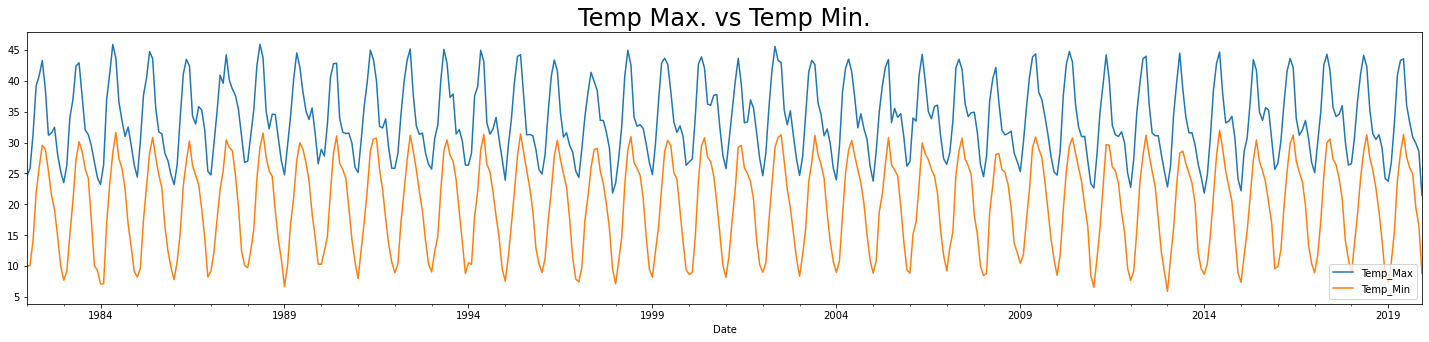

In [15]:

df[['Temp_Max', 'Temp_Min']].plot(figsize=(25,5))
plt.title('Temp Max. vs Temp Min.', size=24)
plt.show()

In [16]:
df[['Temp_Max', 'Temp_Min']].loc['1992']

,Temp_Max,Temp_Min
Date,,
1992-01-01,25.85,8.95
1992-02-01,28.29,10.39
1992-03-01,34.56,17.15
1992-04-01,39.81,22.17
1992-05-01,43.30,27.13
1992-06-01,45.13,31.18
1992-07-01,37.74,28.66
1992-08-01,32.69,25.62
1992-09-01,31.32,22.07


In [17]:
df[['Temp_Max', 'Temp_Min']].loc['2019']

,Temp_Max,Temp_Min
Date,,
2019-01-01,23.75,7.32
2019-02-01,26.75,10.66
2019-03-01,33.09,15.53
2019-04-01,40.94,23.85
2019-05-01,43.28,28.36
2019-06-01,43.56,31.30
2019-07-01,36.02,27.63
2019-08-01,33.26,25.96
2019-09-01,30.86,24.86


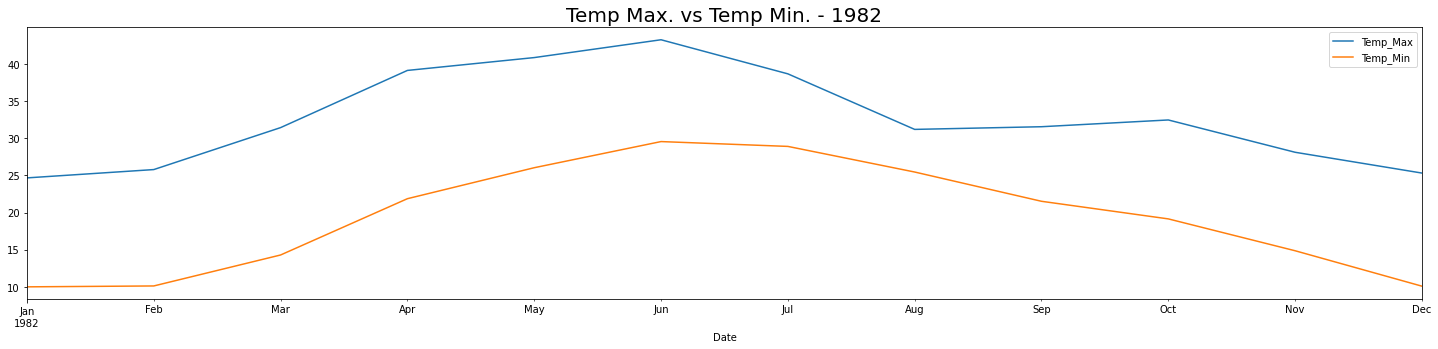

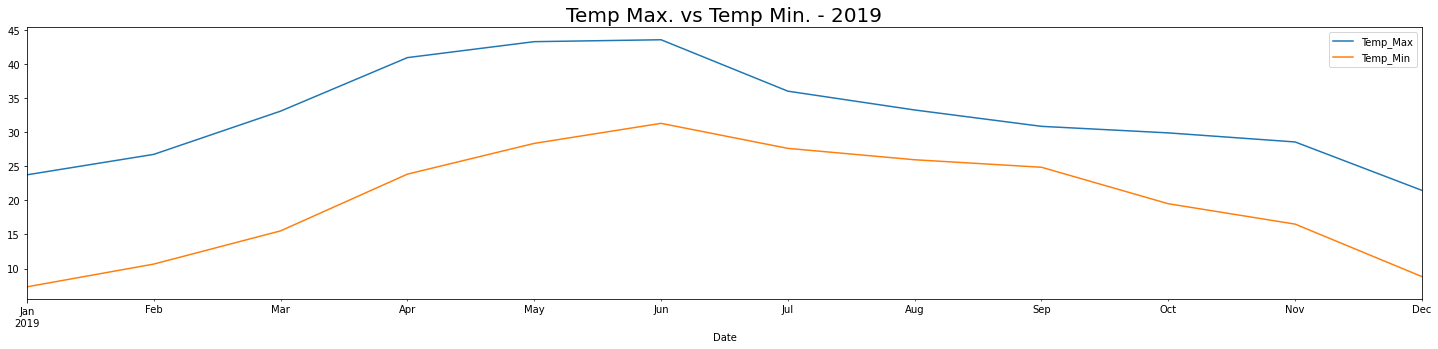

In [18]:
df[['Temp_Max', 'Temp_Min']].loc['1982'].plot(figsize=(25,5))
plt.title('Temp Max. vs Temp Min. - 1982', size=20)
df[['Temp_Max', 'Temp_Min']].loc['2019'].plot(figsize=(25,5))
plt.title('Temp Max. vs Temp Min. - 2019', size=20)
plt.show()

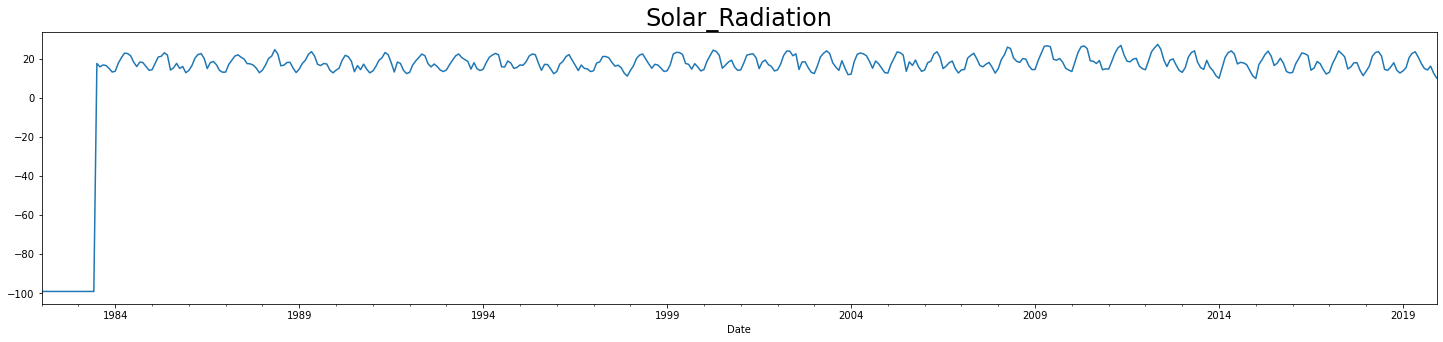

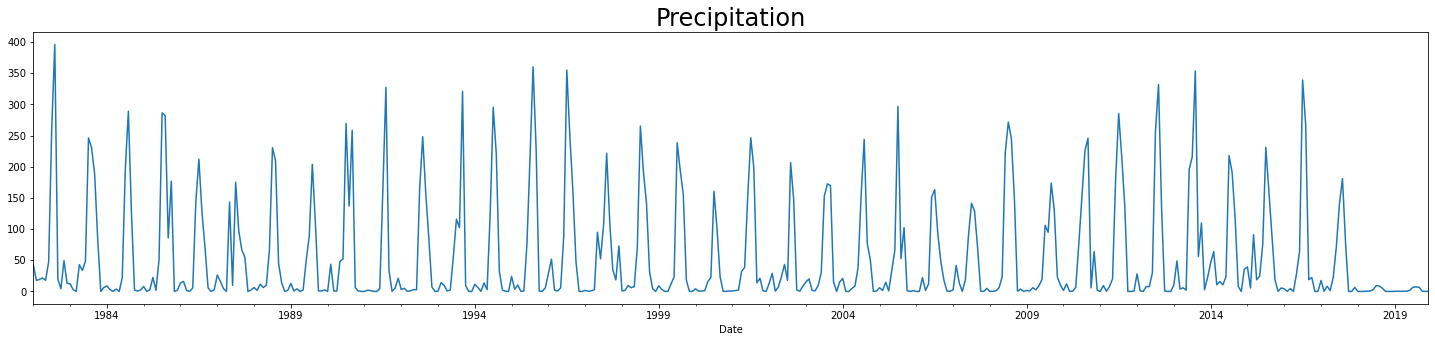

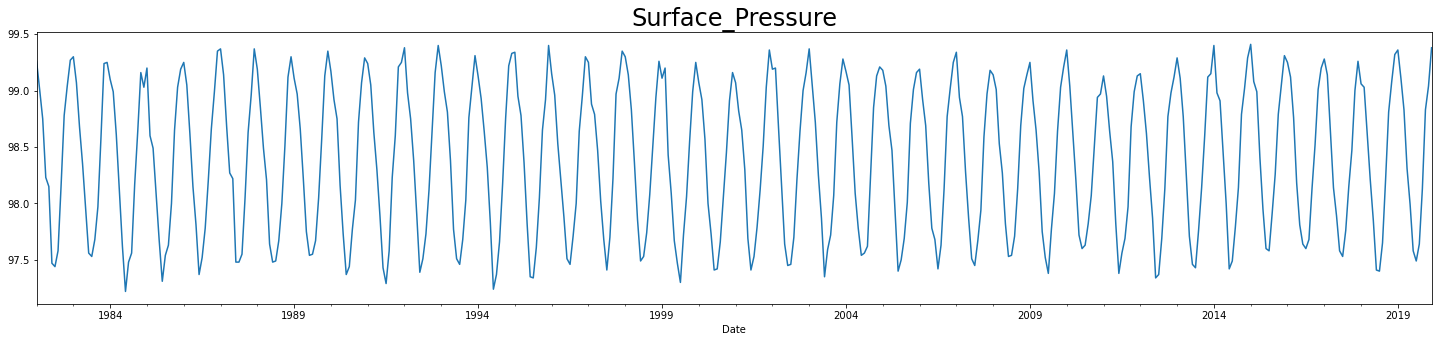

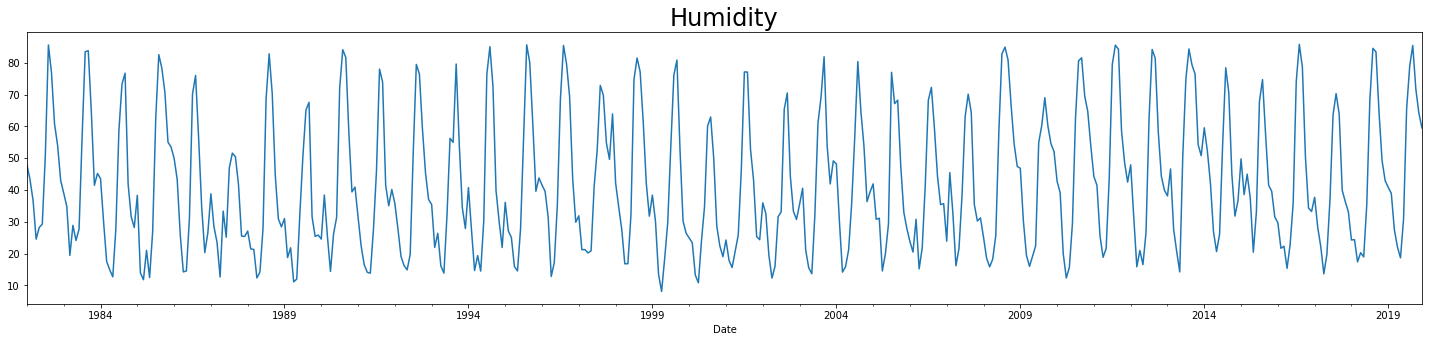

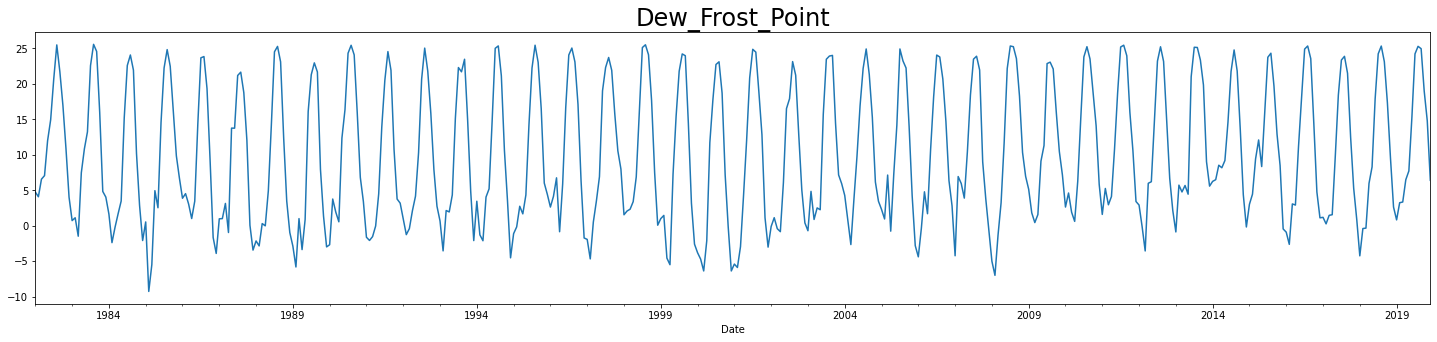

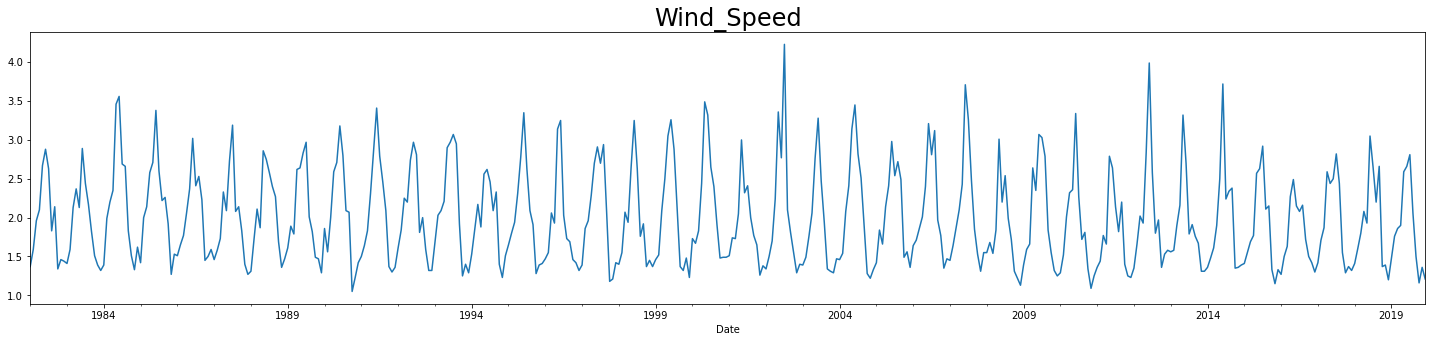

In [19]:
for col in ['Solar_Radiation', 'Precipitation','Surface_Pressure', 'Humidity', 'Dew_Frost_Point', 'Wind_Speed']:
  df[col].plot(figsize=(25,5))
  plt.title(col, size=24)
  plt.show()

In [20]:
# Train/Test split
df_test = df.iloc[-56:] # Test data
df = df.iloc[:-56]

In [21]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import pylab

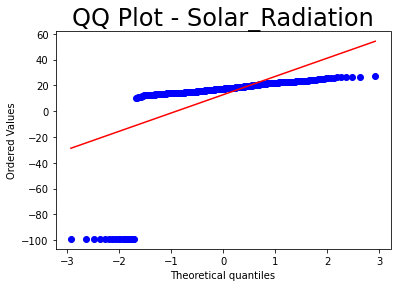

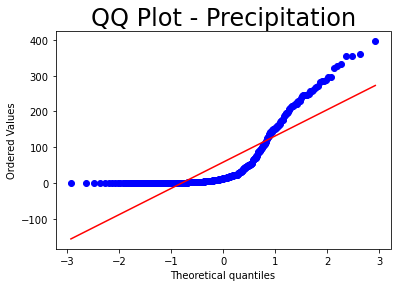

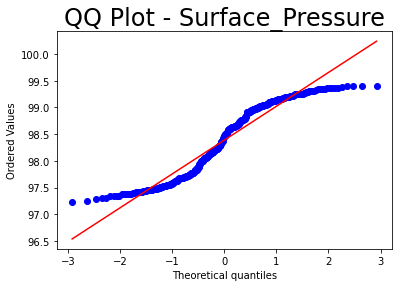

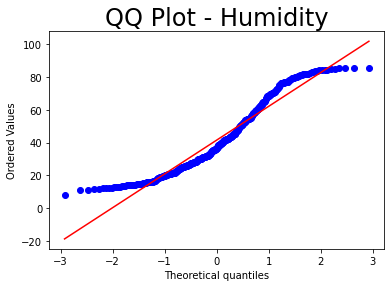

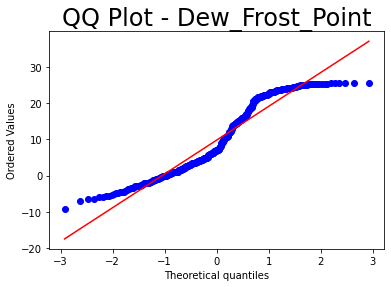

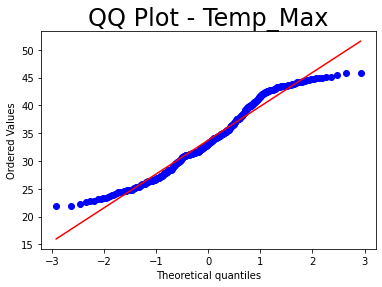

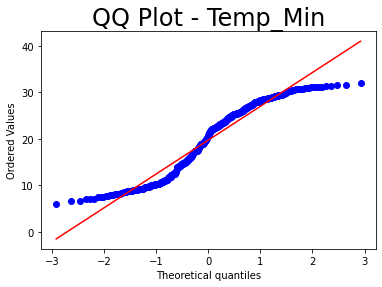

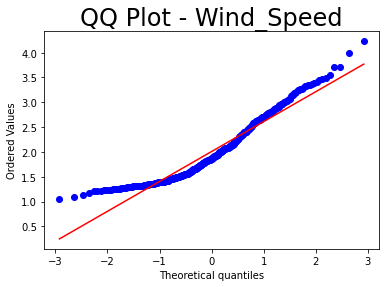

In [22]:
for col in weather_cols:
  scipy.stats.probplot(df[col], plot = pylab)
  plt.title(f"QQ Plot - {col}", size = 24)
  pylab.show()

# TSA for Temp_Max

## Stationarity

In [23]:
sts.adfuller(df.Temp_Max)

(-3.555087984994738,
 0.006680030746308837,
 13,
 386,
 {'1%': -3.447405233596701,
  '5%': -2.8690569369014605,
  '10%': -2.5707743450830893},
 1563.7140974479719)

Test suggests that the TS has stationarity with 99% confidence.

## Seasonality

<Figure size 2160x720 with 0 Axes>

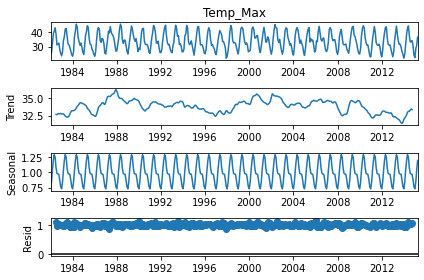

In [24]:
## Seasonality
plt.figure(figsize=(30,10))
s_dec_multiplicative = seasonal_decompose(df.Temp_Max, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## ACF

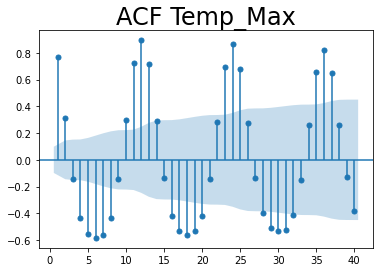

In [25]:
sgt.plot_acf(df.Temp_Max, lags = 40, zero = False)
plt.title("ACF Temp_Max", size = 24)
plt.show()

## PACF

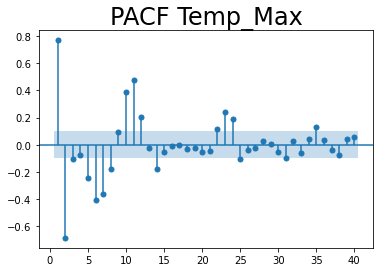

In [26]:
sgt.plot_pacf(df.Temp_Max, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Temp_Max", size = 24)
plt.show()

## Try out Models

In [27]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [28]:
def LLR_test(mod_1, mod_2, DF=1):
  # L1 = mod_1.fit().llf
  # L2 = mod_2.fit().llf
  # LR = (2*(L2-L1))
  # p = chi2.sf(LR, DF).round(3)
  p = chi2.sf(mod_2.llf - mod_1.llf, DF).round(3)
  return p

### Simple AR Model

In [29]:
model_ar_1 = ARMA(df.Temp_Max, order=(1,0))
results_ar_1 = model_ar_1.fit()
print(results_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(1, 0)   Log Likelihood               -1114.318
Method:                       css-mle   S.D. of innovations              3.919
Date:                Wed, 09 Dec 2020   AIC                           2234.635
Time:                        19:18:05   BIC                           2246.610
Sample:                    01-01-1982   HQIC                          2239.377
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             33.7105      0.847     39.812      0.000      32.051      35.370
ar.L1.Temp_Max     0.7705      0.032     24.203      0.000       0.708       0.833
                                    

In [30]:
model_ar_2 = ARMA(df.Temp_Max, order=(2,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(2, 0)   Log Likelihood                -988.529
Method:                       css-mle   S.D. of innovations              2.857
Date:                Wed, 09 Dec 2020   AIC                           1985.058
Time:                        19:18:06   BIC                           2001.024
Sample:                    01-01-1982   HQIC                          1991.381
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             33.7857      0.369     91.469      0.000      33.062      34.510
ar.L1.Temp_Max     1.2979      0.036     35.649      0.000       1.226       1.369
ar.L2.Temp_Max    -0.6847      0.036

In [31]:
model_ar_3 = ARMA(df.Temp_Max, order=(3,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(3, 0)   Log Likelihood                -986.419
Method:                       css-mle   S.D. of innovations              2.842
Date:                Wed, 09 Dec 2020   AIC                           1982.839
Time:                        19:18:06   BIC                           2002.796
Sample:                    01-01-1982   HQIC                          1990.742
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [32]:
# LLR_test(model_ar_1, model_ar_2)
chi2.sf(results_ar_2.llf - results_ar_1.llf, 1).round(3)

0.0

In [33]:
# Residuals
df_ar_resid = pd.DataFrame(results_ar_2.resid, columns=['Temp_Max'])

In [34]:
df_ar_resid['Temp_Max'].mean()

-0.011751466171220148

In [35]:
df_ar_resid['Temp_Max'].var()

8.345979642217788

In [36]:
sts.adfuller(df_ar_resid['Temp_Max'])

(-3.885179812927845,
 0.0021466635523411247,
 17,
 382,
 {'1%': -3.4475850438570115,
  '5%': -2.869135963767125,
  '10%': -2.5708164748773332},
 1573.8748699014002)

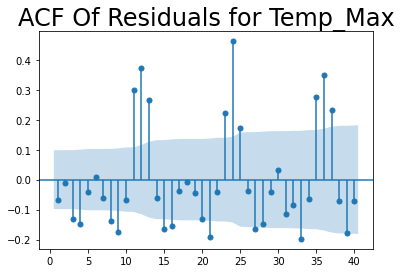

In [37]:
sgt.plot_acf(df_ar_resid['Temp_Max'], zero = False, lags = 40)
plt.title("ACF Of Residuals for Temp_Max",size=24)
plt.show()

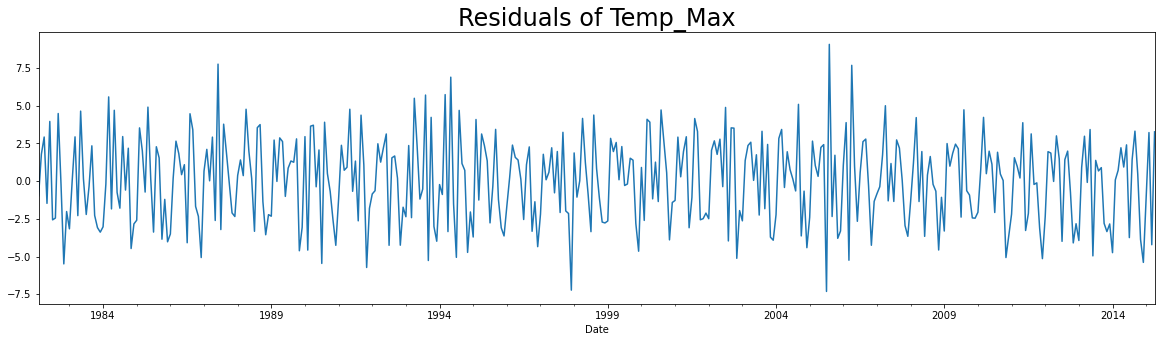

In [38]:
df_ar_resid['Temp_Max'][1:].plot(figsize=(20,5))
plt.title("Residuals of Temp_Max",size=24)
plt.show()

### MA and ARMA Model

In [39]:
model_ma_1 = ARMA(df['Temp_Max'], order=(0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(0, 1)   Log Likelihood               -1120.942
Method:                       css-mle   S.D. of innovations              3.983
Date:                Wed, 09 Dec 2020   AIC                           2247.884
Time:                        19:18:07   BIC                           2259.859
Sample:                    01-01-1982   HQIC                          2252.626
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             33.7608      0.360     93.721      0.000      33.055      34.467
ma.L1.Temp_Max     0.8108      0.023     35.762      0.000       0.766       0.855
                                    

In [40]:
model_arma_1_1 = ARMA(df['Temp_Max'], order=(1,1))
results_arma_1_1 = model_arma_1_1.fit()
print(results_arma_1_1.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(1, 1)   Log Likelihood               -1042.618
Method:                       css-mle   S.D. of innovations              3.273
Date:                Wed, 09 Dec 2020   AIC                           2093.237
Time:                        19:18:07   BIC                           2109.203
Sample:                    01-01-1982   HQIC                          2099.559
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             33.7471      0.724     46.639      0.000      32.329      35.165
ar.L1.Temp_Max     0.6484      0.041     15.755      0.000       0.568       0.729
ma.L1.Temp_Max     0.5630      0.037

In [41]:
model_arma_1_2 = ARMA(df['Temp_Max'], order=(1,2))
results_arma_1_2 = model_arma_1_2.fit()
print(results_arma_1_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_1_2)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(1, 2)   Log Likelihood               -1018.982
Method:                       css-mle   S.D. of innovations              3.084
Date:                Wed, 09 Dec 2020   AIC                           2047.964
Time:                        19:18:07   BIC                           2067.921
Sample:                    01-01-1982   HQIC                          2055.867
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [42]:
model_arma_2_2 = ARMA(df['Temp_Max'], order=(2,2))
results_arma_2_2 = model_arma_2_2.fit()
print(results_arma_2_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_2, results_arma_2_2)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(2, 2)   Log Likelihood                -964.933
Method:                       css-mle   S.D. of innovations              2.691
Date:                Wed, 09 Dec 2020   AIC                           1941.867
Time:                        19:18:07   BIC                           1965.815
Sample:                    01-01-1982   HQIC                          1951.351
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [43]:
model_arma_3_3 = ARMA(df['Temp_Max'], order=(3,3))
results_arma_3_3 = model_arma_3_3.fit()
print(results_arma_3_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_2, results_arma_3_3)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(3, 3)   Log Likelihood                -924.523
Method:                       css-mle   S.D. of innovations              2.419
Date:                Wed, 09 Dec 2020   AIC                           1865.047
Time:                        19:18:08   BIC                           1896.978
Sample:                    01-01-1982   HQIC                          1877.692
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [44]:
model_arma_2_3 = ARMA(df['Temp_Max'], order=(2,3))
results_arma_2_3 = model_arma_2_3.fit()
print(results_arma_2_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_2, results_arma_2_3)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(2, 3)   Log Likelihood                -942.405
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 09 Dec 2020   AIC                           1898.810
Time:                        19:18:09   BIC                           1926.750
Sample:                    01-01-1982   HQIC                          1909.874
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [45]:
model_arma_3_2 = ARMA(df['Temp_Max'], order=(3,2))
results_arma_3_2 = model_arma_3_2.fit()
print(results_arma_3_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_2, results_arma_3_2)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(3, 2)   Log Likelihood                -964.779
Method:                       css-mle   S.D. of innovations              2.690
Date:                Wed, 09 Dec 2020   AIC                           1943.557
Time:                        19:18:09   BIC                           1971.497
Sample:                    01-01-1982   HQIC                          1954.622
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [46]:
model_arma_2_4 = ARMA(df['Temp_Max'], order=(2,4))
results_arma_2_4 = model_arma_2_4.fit()
print(results_arma_2_4.summary())
print("\nLLR test p-value (2,3) | (2,4) = " + str(LLR_test(results_arma_2_3, results_arma_2_4)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(2, 4)   Log Likelihood                -915.213
Method:                       css-mle   S.D. of innovations              2.363
Date:                Wed, 09 Dec 2020   AIC                           1846.425
Time:                        19:18:10   BIC                           1878.357
Sample:                    01-01-1982   HQIC                          1859.071
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [47]:
model_arma_2_5 = ARMA(df['Temp_Max'], order=(2,5))
results_arma_2_5 = model_arma_2_5.fit()
print(results_arma_2_5.summary())
print("\nLLR test p-value (2,4) | (2,5) = " + str(LLR_test(results_arma_2_4, results_arma_2_5)))

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                              ARMA Model Results                              
Dep. Variable:               Temp_Max   No. Observations:                  400
Model:                     ARMA(2, 5)   Log Likelihood                -915.367
Method:                       css-mle   S.D. of innovations              2.368
Date:                Wed, 09 Dec 2020   AIC                           1848.735
Time:                        19:18:11   BIC                           1884.658
Sample:                    01-01-1982   HQIC                          1862.961
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [48]:
df_arma_resid = pd.DataFrame(results_arma_2_4.resid, columns=['Temp_Max'])

In [49]:
df_arma_resid['Temp_Max'].mean()

-0.006176065295419351

In [50]:
df_arma_resid['Temp_Max'].var() ** (1/2)

2.4174970303314223

In [51]:
sts.adfuller(df_arma_resid['Temp_Max'])

(-3.564828687360915,
 0.006470142135801475,
 12,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 1556.0456157396363)

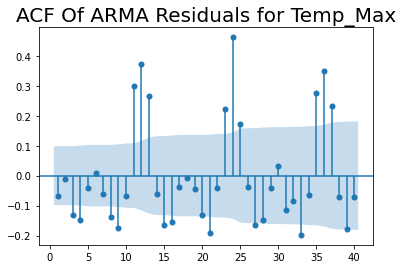

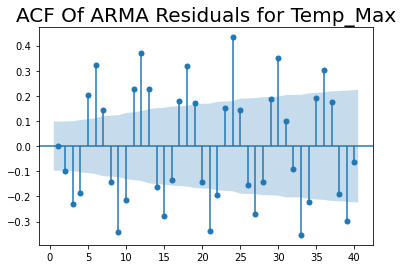

In [52]:
sgt.plot_acf(df_ar_resid['Temp_Max'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Temp_Max",size=20)
plt.show()

sgt.plot_acf(df_arma_resid['Temp_Max'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Temp_Max",size=20)
plt.show()

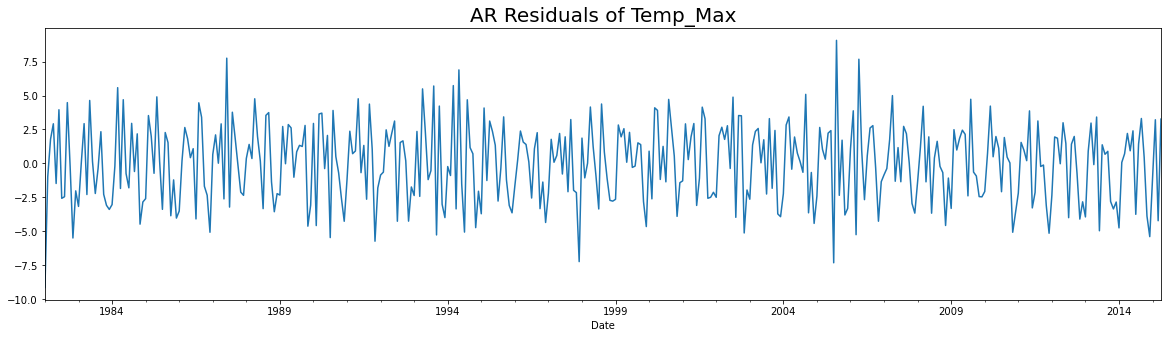

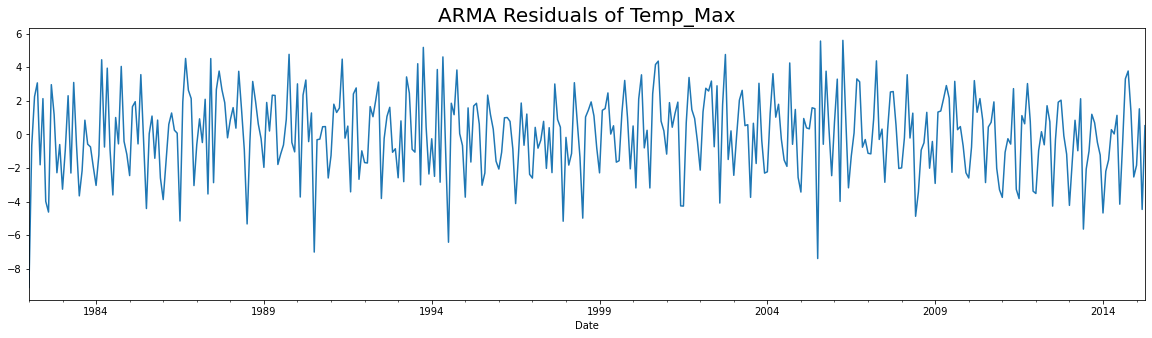

In [53]:
df_ar_resid['Temp_Max'].plot(figsize=(20,5))
plt.title("AR Residuals of Temp_Max",size=20)
plt.show()

df_arma_resid['Temp_Max'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Temp_Max",size=20)
plt.show()

### SARIMAX Model

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model_sarimax_1 = SARIMAX(df['Temp_Max'], order=(1,0,1), seasonal_order = (1,0,1,12))
results_sarimax_1 = model_sarimax_1.fit()
print(results_sarimax_1.summary())

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                                     SARIMAX Results                                      
Dep. Variable:                           Temp_Max   No. Observations:                  400
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -801.388
Date:                            Wed, 09 Dec 2020   AIC                           1612.776
Time:                                    19:18:16   BIC                           1632.734
Sample:                                01-01-1982  

In [56]:
model_sarimax_2 = SARIMAX(df['Temp_Max'], order=(1,0,3), seasonal_order = (1,0,1,12))
results_sarimax_2 = model_sarimax_2.fit()
print(results_sarimax_2.summary()

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                                      SARIMAX Results                                       
Dep. Variable:                             Temp_Max   No. Observations:                  400
Model:             SARIMAX(1, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -786.166
Date:                              Wed, 09 Dec 2020   AIC                           1586.333
Time:                                      19:18:18   BIC                           1614.273
Sample:                                  

In [57]:
model_sarimax_3 = SARIMAX(df['Temp_Max'], order=(1,0,3), seasonal_order = (2,0,1,12))
results_sarimax_3 = model_sarimax_3.fit()
print(results_sarimax_3.summary())

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                                      SARIMAX Results                                       
Dep. Variable:                             Temp_Max   No. Observations:                  400
Model:             SARIMAX(1, 0, 3)x(2, 0, [1], 12)   Log Likelihood                -785.441
Date:                              Wed, 09 Dec 2020   AIC                           1586.882
Time:                                      19:18:21   BIC                           1618.814
Sample:                                  

In [58]:
LLR_test(results_sarimax_2, results_sarimax_3)

0.394

In [59]:
model_sarimax_4 = SARIMAX(df['Temp_Max'], order=(2,0,4), seasonal_order = (1,0,1,12))
results_sarimax_4 = model_sarimax_4.fit()
print(results_sarimax_4.summary())

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                                      SARIMAX Results                                       
Dep. Variable:                             Temp_Max   No. Observations:                  400
Model:             SARIMAX(2, 0, 4)x(1, 0, [1], 12)   Log Likelihood                -783.865
Date:                              Wed, 09 Dec 2020   AIC                           1585.730
Time:                                      19:18:23   BIC                           1621.653
Sample:                                  

In [60]:
LLR_test(results_sarimax_2, results_sarimax_4, 2)

0.316

In [61]:
df_sarimax_resid = pd.DataFrame(results_sarimax_2.resid, columns=['Temp_Max'])

In [62]:
df_sarimax_resid['Temp_Max'].mean()

0.07577102505721087

In [63]:
df_sarimax_resid['Temp_Max'].var() ** (1/2)

2.2218678842093995

In [64]:
sts.adfuller(df_sarimax_resid['Temp_Max'])

(-21.303782996642994,
 0.0,
 0,
 399,
 {'1%': -3.446845912589748,
  '5%': -2.8688110853002007,
  '10%': -2.5706432834592747},
 1474.103610913689)

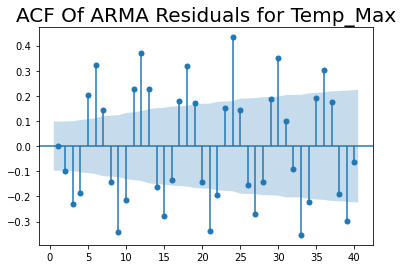

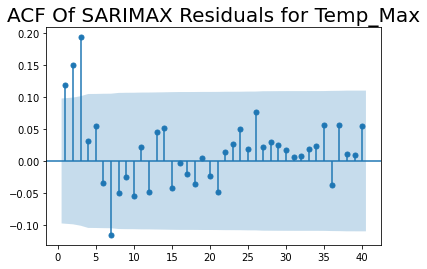

In [65]:
sgt.plot_acf(df_arma_resid['Temp_Max'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Temp_Max",size=20)
plt.show()

sgt.plot_acf(df_sarimax_resid['Temp_Max'], zero = False, lags = 40)
plt.title("ACF Of SARIMAX Residuals for Temp_Max",size=20)
plt.show()

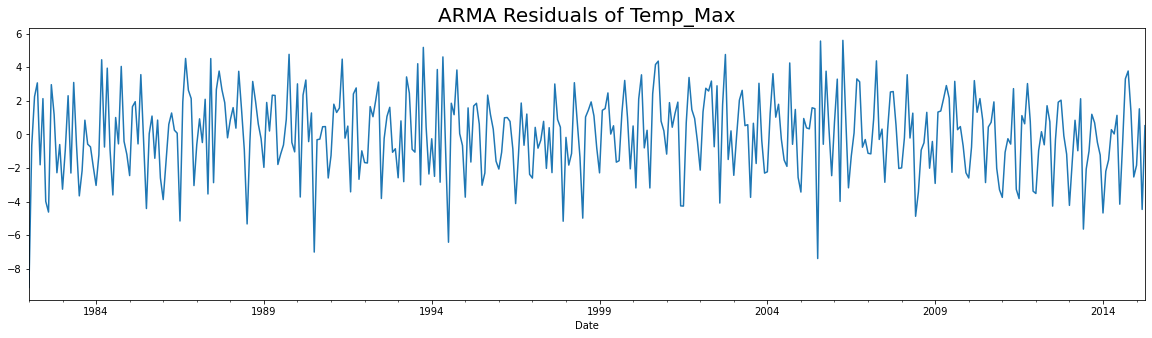

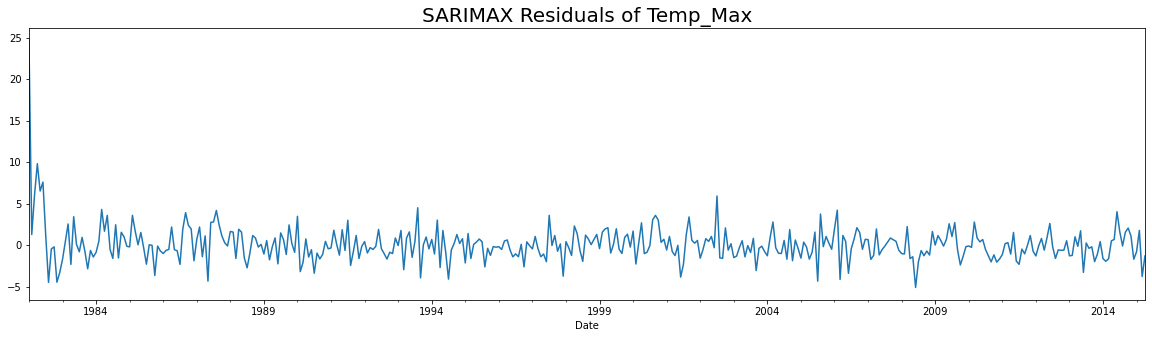

In [66]:
df_arma_resid['Temp_Max'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Temp_Max",size=20)
plt.show()

df_sarimax_resid['Temp_Max'].plot(figsize=(20,5))
plt.title("SARIMAX Residuals of Temp_Max",size=20)
plt.show()

# Test

In [67]:
df_test.iloc[42]

Solar_Radiation     14.07
Precipitation        0.00
Surface_Pressure    99.08
Humidity            49.14
Dew_Frost_Point      9.58
Temp_Max            29.10
Temp_Min            14.12
Wind_Speed           1.39
Name: 2018-11-01 00:00:00, dtype: float64

In [68]:
df_test.index

DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
     

In [69]:
df_test.loc[('2019-12-1')]['Temp_Max']

21.47

In [70]:
results_sarimax_2.predict(('2020-11-01'))

2020-11-01    28.051
Freq: MS, dtype: float64

In [71]:
results_sarimax_2.predict(('2020-12-01')) # 1-Dec-2020

2020-12-01    24.248367
Freq: MS, dtype: float64

In [72]:
actuals = [df_test.loc[i]['Temp_Max'] for i in df_test.index]
predictions = []
for i in df_test.index:
  predicted_temp_max = results_sarimax_2.predict(str(i.date())).get(0)
  predictions.append(predicted_temp_max)

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(actuals, predictions)

0.870467157679731

In [75]:
df_pred = pd.DataFrame(columns=['Actual', 'Predicted'])
df_pred['Actual'] = actuals
df_pred['Predicted'] = [item for item in results_sarimax_2.forecast(56)]
df_pred

,Actual,Predicted
0,43.41,41.371328
1,41.69,40.632755
2,34.94,34.836780
3,33.59,32.021320
4,35.66,31.730337
5,35.22,31.544241
6,30.50,28.374615
7,25.67,24.559178
8,26.62,23.106522
9,30.26,27.206943


In [76]:
import pickle

In [77]:
# with open("/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/TimeSeries_Models/Temp_Max_Model.pkl", "wb") as file:
#   pickle.dump(results_sarimax_2, file)